添付ファイルの中にnoizy_data.csvがあります。このデータ点にフィットする関数を求めてください  
答えとなる関数は( y = x**3 + 20x + 6x -4)です。


In [2]:
!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchviz import make_dot

%matplotlib inline

In [5]:
df = pd.read_csv("/content/drive/MyDrive/220918_send/noizy_data.csv", index_col=0)

In [6]:
df.head()

,x,y
0,-5.00000,-58.227625
1,-4.89899,-50.779422
2,-4.79798,-46.059515
3,-4.69697,-42.551186
4,-4.59596,-34.974764


In [7]:
x = df.iloc[:, 0]
x

0    -5.00000
1    -4.89899
2    -4.79798
3    -4.69697
4    -4.59596
       ...   
95    4.59596
96    4.69697
97    4.79798
98    4.89899
99    5.00000
Name: x, Length: 100, dtype: float64

In [8]:

y = df.iloc[:, 1]
y

0    -58.227625
1    -50.779422
2    -46.059515
3    -42.551186
4    -34.974764
        ...    
95    28.423812
96    34.390215
97    38.456813
98    43.618069
99    51.619844
Name: y, Length: 100, dtype: float64

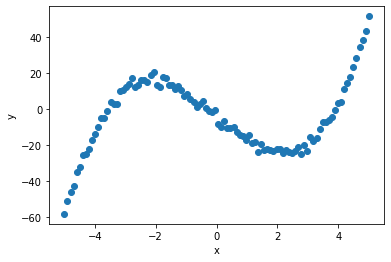

In [9]:
# xとyの関係のグラフ化
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

グラフ的に３次関数

In [10]:
# 値の標準化
X = x - x.mean()
Y = y - y.mean()

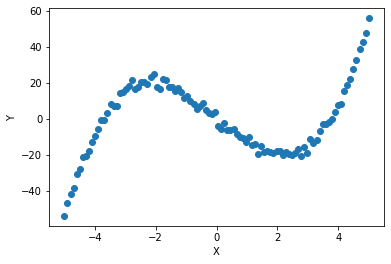

In [11]:
# 標準化したあとのグラフ化
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [12]:
# pytortchを使うためにXとYをテンソル変数化していく
X = torch.tensor(X).float()
X

tensor([-5.0000, -4.8990, -4.7980, -4.6970, -4.5960, -4.4949, -4.3939, -4.2929,
        -4.1919, -4.0909, -3.9899, -3.8889, -3.7879, -3.6869, -3.5859, -3.4848,
        -3.3838, -3.2828, -3.1818, -3.0808, -2.9798, -2.8788, -2.7778, -2.6768,
        -2.5758, -2.4747, -2.3737, -2.2727, -2.1717, -2.0707, -1.9697, -1.8687,
        -1.7677, -1.6667, -1.5657, -1.4646, -1.3636, -1.2626, -1.1616, -1.0606,
        -0.9596, -0.8586, -0.7576, -0.6566, -0.5556, -0.4545, -0.3535, -0.2525,
        -0.1515, -0.0505,  0.0505,  0.1515,  0.2525,  0.3535,  0.4545,  0.5556,
         0.6566,  0.7576,  0.8586,  0.9596,  1.0606,  1.1616,  1.2626,  1.3636,
         1.4646,  1.5657,  1.6667,  1.7677,  1.8687,  1.9697,  2.0707,  2.1717,
         2.2727,  2.3737,  2.4747,  2.5758,  2.6768,  2.7778,  2.8788,  2.9798,
         3.0808,  3.1818,  3.2828,  3.3838,  3.4848,  3.5859,  3.6869,  3.7879,
         3.8889,  3.9899,  4.0909,  4.1919,  4.2929,  4.3939,  4.4949,  4.5960,
         4.6970,  4.7980,  4.8990,  5.00

In [13]:
Y = torch.tensor(Y).float()
Y

tensor([-54.0592, -46.6110, -41.8911, -38.3827, -30.8063, -28.2118, -21.3561,
        -21.0337, -17.7724, -12.7681,  -9.4962,  -5.7906,  -0.7002,  -1.0140,
          3.2412,   7.9871,   7.1519,   7.2114,  13.9944,  14.7776,  16.6414,
         18.2869,  21.6858,  16.6118,  17.6374,  20.2569,  20.3383,  19.1418,
         23.0499,  24.5317,  17.8537,  16.3510,  22.1987,  21.5353,  17.5448,
         17.3818,  15.2764,  17.2746,  14.6938,  11.2324,  12.8541,   9.7225,
          7.8805,   5.3761,   7.2149,   8.4791,   5.0408,   3.1884,   2.7750,
          3.6652,  -4.1641,  -5.6949,  -2.6114,  -6.5097,  -6.3407,  -6.0349,
         -8.3468, -10.1731, -10.5816, -12.9655, -10.4162, -14.6249, -13.9987,
        -19.4903, -15.2600, -18.6971, -17.9513, -18.5696, -19.0208, -18.0225,
        -18.2475, -20.2713, -18.5869, -19.5396, -19.9830, -19.0747, -16.8123,
        -20.9997, -15.8858, -19.2583, -11.5421, -13.3870, -12.0380,  -6.6669,
         -3.1766,  -2.7558,  -2.0606,  -0.2455,   3.8348,   7.59

一次関数  
$y = ax + b$  
二次関数  
$y = ax^2 + bx + c$  
三次関数  
$y = ax^3 + bx^2 + cx + d$

グラフが３次関数の形だったので、  
３つの変数と１つの定数を用意する必要がある

In [14]:
a = torch.tensor(1.0, requires_grad=True).float()
b = torch.tensor(1.0, requires_grad=True).float()
c = torch.tensor(1.0, requires_grad=True).float()
d = torch.tensor(1.0, requires_grad=True).float()

In [15]:
# 三次関数用意  
def pred(X):
  return a * X ** 3 + b * X ** 2 + c * X + d

In [16]:
# 予測値の計算
Yp = pred(X)
Yp

tensor([-1.0400e+02, -9.7475e+01, -9.1230e+01, -8.5258e+01, -7.9553e+01,
        -7.4109e+01, -6.8920e+01, -6.3979e+01, -5.9281e+01, -5.4819e+01,
        -5.0587e+01, -4.6579e+01, -4.2788e+01, -3.9209e+01, -3.5836e+01,
        -3.2661e+01, -2.9680e+01, -2.6885e+01, -2.4270e+01, -2.1831e+01,
        -1.9559e+01, -1.7449e+01, -1.5495e+01, -1.3691e+01, -1.2030e+01,
        -1.0507e+01, -9.1142e+00, -7.8467e+00, -6.6980e+00, -5.6617e+00,
        -4.7318e+00, -3.9021e+00, -3.1664e+00, -2.5185e+00, -1.9522e+00,
        -1.4614e+00, -1.0398e+00, -6.8131e-01, -3.7969e-01, -1.2878e-01,
         7.7609e-02,  2.4566e-01,  3.8156e-01,  4.9148e-01,  5.8162e-01,
         6.5815e-01,  7.2726e-01,  7.9514e-01,  8.6796e-01,  9.5192e-01,
         1.0532e+00,  1.1780e+00,  1.3324e+00,  1.5227e+00,  1.7551e+00,
         2.0357e+00,  2.3707e+00,  2.7663e+00,  3.2287e+00,  3.7640e+00,
         4.3786e+00,  5.0784e+00,  5.8698e+00,  6.7588e+00,  7.7518e+00,
         8.8548e+00,  1.0074e+01,  1.1416e+01,  1.2

In [17]:
Yp = Yp.data.numpy()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20462 missing from current font.
  font.set_

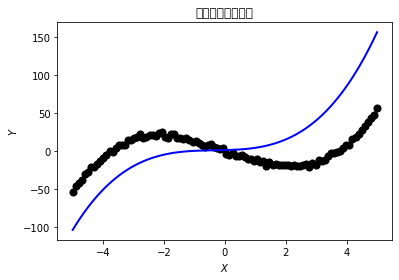

In [18]:
# グラフ描画

plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot(X, Yp, lw=2, c='b')
plt.title('パラメータ修正前')
plt.show()

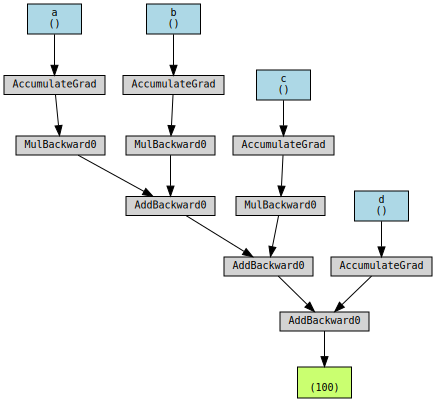

In [23]:
# 予測値の計算グラフ可視化

params = {'a': a, 'b': b, 'c': c, 'd': d}
g = make_dot(Yp, params=params)
display(g)

In [24]:
# 実際の値と予測した値の誤差を小さくしたい (根本) 
# ⇒lossを小さくしていく→loss計算
# そのlossを計算していくにあたって平均二乗誤差を使って計算していく
def mse(Yp, Y):
  loss = ((Yp- Y) ** 2).mean()
  return loss

In [25]:
Yp = pred(X)
# loss計算
loss = mse(Yp, Y)
loss

tensor(2070.9436, grad_fn=<MeanBackward0>)

In [26]:
# 実際の値と予測した値の誤差を小さくしたい (根本) 
# ⇒勾配計算を行っていく
loss.backward()

In [27]:
# それぞれの値に対しての傾き
# ⇒値.grad
print(a.grad)
print(b.grad)
print(c.grad)
print(d.grad)

tensor(7828.6094)
tensor(556.6615)
tensor(510.8203)
tensor(38.0067)


In [28]:
# パラメータの修正
# altha = lr
lr = 0.0001

In [29]:
# パラメータの修正
with torch.no_grad():
    a -= lr * a.grad
    b -= lr * b.grad
    c -= lr * c.grad
    d -= lr * d.grad

    # 計算済みの勾配値をリセットする
    # 無限ループに入ってしまうため
    a.grad.zero_()
    b.grad.zero_()
    c.grad.zero_()
    d.grad.zero_()

In [30]:
print(a)
print(b)
print(c)
print(d)
print(a.grad)
print(b.grad)
print(c.grad)
print(d.grad)

tensor(0.2171, requires_grad=True)
tensor(0.9443, requires_grad=True)
tensor(0.9489, requires_grad=True)
tensor(0.9962, requires_grad=True)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)


# パラメータ修正①

In [ ]:
# この後の繰り返し処理を行うための準備
# 初期化

# a～dを変数として扱う
a = torch.tensor(1.0, requires_grad=True).float()
b = torch.tensor(1.0, requires_grad=True).float()
c = torch.tensor(1.0, requires_grad=True).float()
d = torch.tensor(1.0, requires_grad=True).float()

# 繰り返し回数
num_epochs = 50000

# 学習率
lr = 0.0001

# 記録用配列初期化
history = np.zeros((0, 2))

# Ypの記録のため
Yp_history = []

In [ ]:

# 適切なパラメータを探すために繰り返し処理を行う
# ループ処理

for epoch in range(num_epochs):

    # 予測計算
    Yp = pred(X)
    
    # 損失計算
    loss = mse(Yp, Y)
    
    # 勾配計算
    loss.backward()
     
    with torch.no_grad():
      a -= lr * a.grad
      b -= lr * b.grad
      c -= lr * c.grad
      d -= lr * d.grad

      # print(f'a = {a}')
      # print(f'b = {b}')
      # print(f'c = {c}')
      # print(f'd = {d}')

      # 計算済みの勾配値をリセットする
      a.grad.zero_()
      b.grad.zero_()
      c.grad.zero_()
      d.grad.zero_()
              
    # 損失の記録
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch}  loss = {loss:.4f} d = {d}')

    # グラフの動きをみるため
    if(epoch %1000 == 0):
        Yp_history.append(Yp)
    

a = 0.1790601760149002
b = 0.7308632731437683
c = 0.9105537533760071
d = 0.9815248847007751
epoch = 0  loss = 389.5193 d = 0.9815248847007751
a = 0.17895542085170746
b = 0.7100636959075928
c = 0.9065231084823608
d = 0.9800858497619629
a = 0.17900517582893372
b = 0.6898077130317688
c = 0.9025020003318787
d = 0.9786824584007263
a = 0.17913596332073212
b = 0.6700810790061951
c = 0.8984864354133606
d = 0.9773138165473938
a = 0.17930926382541656
b = 0.6508700251579285
c = 0.8944743275642395
d = 0.9759789705276489


In [ ]:
# 結果の確認
# パラメータの最終値
print('a = ', a.data.numpy())
print('b = ', b.data.numpy())
print('c = ', c.data.numpy())
print('d = ', d.data.numpy())

#損失の確認
print(f'初期状態: 損失:{history[0,1]:.4f}') 
print(f'最終状態: 損失:{history[-1,1]:.4f}') 

a =  0.9916182
b =  -0.010688948
c =  -13.892621
d =  0.09535088
初期状態: 損失:2070.9436
最終状態: 損失:3.3882


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_

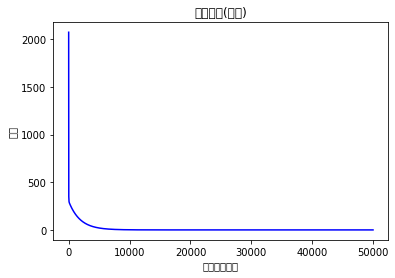

In [ ]:
# 学習曲線の表示 (損失)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20462 missing from current font.
  font.set_

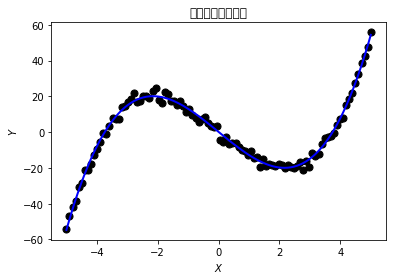

In [ ]:
Yp = Yp.data.numpy()
# グラフ描画

plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot(X, Yp, lw=2, c='b')
plt.title('パラメータ修正後')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20462 missing from current font.
  font.set_

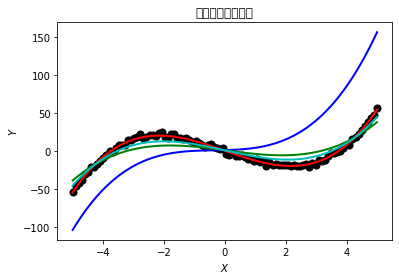

In [ ]:

# グラフ描画

plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot(X, Yp, lw=2, c='r')
plt.plot(X, Yp_history[0].data.numpy(), lw=2, c='b')
plt.plot(X, Yp_history[2].data.numpy(), lw=2, c='g')
plt.plot(X, Yp_history[4].data.numpy(), lw=2, c='c')
plt.title('パラメータ修正後')
plt.show()

# パラメータ修正②

In [31]:
# この後の繰り返し処理を行うための準備
# 初期化

# a～dを変数として扱う
a = torch.tensor(1.0, requires_grad=True).float()
b = torch.tensor(1.0, requires_grad=True).float()
c = torch.tensor(1.0, requires_grad=True).float()
d = torch.tensor(-4.0, requires_grad=False).float()

# 繰り返し回数
num_epochs = 50000

# 学習率
lr = 0.0001

# 記録用配列初期化
history = np.zeros((0, 2))

# Ypの記録のため
Yp_history = []

In [32]:

# 適切なパラメータを探すために繰り返し処理を行う
# ループ処理

for epoch in range(num_epochs):

    # 予測計算
    Yp = pred(X)
    
    # 損失計算
    loss = mse(Yp, Y)
    
    # 勾配計算
    loss.backward()
     
    with torch.no_grad():
      a -= lr * a.grad
      b -= lr * b.grad
      c -= lr * c.grad
      # d -= lr * d.grad

      # 計算済みの勾配値をリセットする
      a.grad.zero_()
      b.grad.zero_()
      c.grad.zero_()
      # d.grad.zero_()
              
    # 損失の記録
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch}  loss = {loss:.4f} d = {d}')

    # グラフの動きをみるため
    if(epoch %1000 == 0):
        Yp_history.append(Yp)

epoch = 0  loss = 2000.9269 d = -4.0
epoch = 10  loss = 351.3029 d = -4.0
epoch = 20  loss = 332.3170 d = -4.0
epoch = 30  loss = 320.4615 d = -4.0
epoch = 40  loss = 312.8156 d = -4.0
epoch = 50  loss = 307.6579 d = -4.0
epoch = 60  loss = 303.9724 d = -4.0
epoch = 70  loss = 301.1593 d = -4.0
epoch = 80  loss = 298.8646 d = -4.0
epoch = 90  loss = 296.8793 d = -4.0
epoch = 100  loss = 295.0800 d = -4.0
epoch = 110  loss = 293.3939 d = -4.0
epoch = 120  loss = 291.7779 d = -4.0
epoch = 130  loss = 290.2068 d = -4.0
epoch = 140  loss = 288.6654 d = -4.0
epoch = 150  loss = 287.1450 d = -4.0
epoch = 160  loss = 285.6401 d = -4.0
epoch = 170  loss = 284.1478 d = -4.0
epoch = 180  loss = 282.6661 d = -4.0
epoch = 190  loss = 281.1939 d = -4.0
epoch = 200  loss = 279.7307 d = -4.0
epoch = 210  loss = 278.2758 d = -4.0
epoch = 220  loss = 276.8292 d = -4.0
epoch = 230  loss = 275.3905 d = -4.0
epoch = 240  loss = 273.9597 d = -4.0
epoch = 250  loss = 272.5367 d = -4.0
epoch = 260  loss = 27

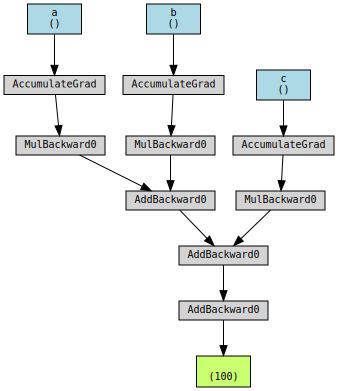

In [33]:
# 予測値の計算グラフ可視化

params = {'a': a, 'b': b, 'c': c, 'd': d}
g = make_dot(Yp, params=params)
display(g)

In [38]:
# 結果の確認
# パラメータの最終値
print('a = ', a.data.numpy())
print('b = ', b.data.numpy())
print('c = ', c.data.numpy())
print('d = ', d.data.numpy())

#損失の確認
print(f'初期状態: 損失:{history[0,1]:.4f}') 
print(f'最終状態: 損失:{history[-1,1]:.4f}') 

a =  0.9916182
b =  0.2569665
c =  -13.892621
d =  -4.0
初期状態: 損失:2000.9269
最終状態: 損失:10.8043


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_

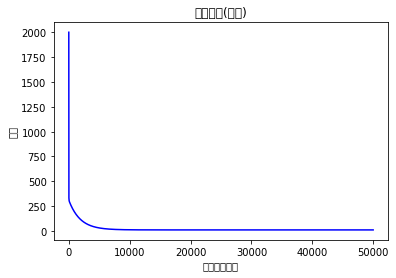

In [35]:
# 学習曲線の表示 (損失)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20462 missing from current font.
  font.set_

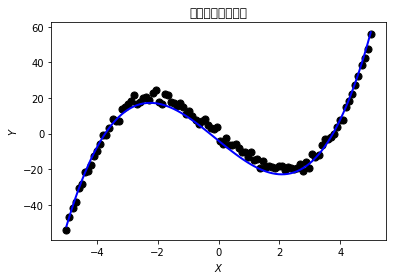

In [36]:
Yp = Yp.data.numpy()
# グラフ描画

plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot(X, Yp, lw=2, c='b')
plt.title('パラメータ修正後')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20462 missing from current font.
  font.set_

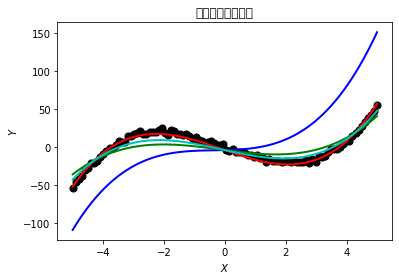

In [37]:
# グラフ描画

plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot(X, Yp, lw=2, c='r')
plt.plot(X, Yp_history[0].data.numpy(), lw=2, c='b')
plt.plot(X, Yp_history[2].data.numpy(), lw=2, c='g')
plt.plot(X, Yp_history[4].data.numpy(), lw=2, c='c')
plt.title('パラメータ修正後')
plt.show()